## Project - Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank_data.csv")

In [3]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,NaN,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329.0,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153.0,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151.0,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129.0,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4521 non-null   int64  
 1   age         4521 non-null   int64  
 2   job         4521 non-null   object 
 3   marital     4510 non-null   object 
 4   education   4514 non-null   object 
 5   default     4521 non-null   object 
 6   balance     4515 non-null   float64
 7   housing     4518 non-null   object 
 8   loan        4518 non-null   object 
 9   contact     4486 non-null   object 
 10  day         4521 non-null   int64  
 11  month       4521 non-null   object 
 12  duration    4514 non-null   float64
 13  campaign    4521 non-null   int64  
 14  pdays       4521 non-null   int64  
 15  previous    4521 non-null   int64  
 16  poutcome    4521 non-null   object 
 17  y           4521 non-null   object 
dtypes: float64(2), int64(6), object(10)
memory usage: 635.9+ KB


In [5]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4515.000000,4521.000000,4514.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1420.750831,15.915284,263.884360,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.178500,8.247667,259.812643,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,68.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1477.000000,21.000000,329.750000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital       11
education      7
default        0
balance        6
housing        3
loan           3
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
df.shape

(4521, 18)

In [8]:
df.drop('Unnamed: 0',axis='columns',inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,NaN,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329.0,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153.0,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151.0,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129.0,4,211,3,other,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4510 non-null   object 
 3   education  4514 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4515 non-null   float64
 6   housing    4518 non-null   object 
 7   loan       4518 non-null   object 
 8   contact    4486 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4514 non-null   float64
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB


In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [11]:
df[df['marital'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
46,55,blue-collar,NaN,primary,no,145.0,no,no,telephone,2,feb,59.0,3,5,2,other,no
49,61,admin.,NaN,unknown,no,4629.0,yes,no,cellular,27,jan,181.0,1,92,1,success,yes
50,45,blue-collar,NaN,primary,no,844.0,no,no,unknown,5,jun,1018.0,3,-1,0,unknown,yes
52,38,technician,NaN,secondary,no,50.0,no,no,cellular,29,aug,98.0,2,-1,0,unknown,no
54,53,blue-collar,NaN,secondary,no,2231.0,yes,no,cellular,14,jul,272.0,3,-1,0,unknown,no
56,57,management,NaN,secondary,no,82.0,no,yes,NaN,4,feb,140.0,1,-1,0,unknown,no
306,49,entrepreneur,NaN,secondary,no,687.0,yes,no,NaN,17,apr,772.0,1,-1,0,unknown,yes
310,49,blue-collar,NaN,secondary,no,8545.0,yes,yes,cellular,6,may,199.0,7,167,1,failure,no
312,43,blue-collar,NaN,primary,no,2.0,yes,no,cellular,30,jul,783.0,3,-1,0,unknown,no
367,32,management,NaN,tertiary,no,NaN,yes,no,NaN,17,apr,245.0,1,149,2,failure,no


In [12]:
print ( Counter(df['marital']))

Counter({'married': 2790, 'single': 1193, 'divorced': 527, nan: 11})


In [13]:
pd.crosstab(df['housing'],df['marital'])

marital,divorced,married,single
housing,,,
no,229,1169,559
yes,298,1618,634


In [14]:
pd.crosstab(df['marital'],df['housing'])

housing,no,yes
marital,,
divorced,229,298
married,1169,1618
single,559,634


In [15]:
marital_null=df[df['marital'].isnull()].index.tolist()
marital_null

[46, 49, 50, 52, 54, 56, 306, 310, 312, 367, 445]

In [16]:
df['marital'].iloc[marital_null]='married'

In [17]:
df.isnull().sum()

age           0
job           0
marital       0
education     7
default       0
balance       6
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [18]:
df['education'].unique()

array([nan, 'secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [19]:
print ( Counter(df['education']))

Counter({'secondary': 2302, 'tertiary': 1349, 'primary': 676, 'unknown': 187, nan: 7})


In [20]:
df[df['education'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,NaN,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
37,32,blue-collar,married,NaN,no,2089.0,yes,no,cellular,14,nov,132.0,1,-1,0,unknown,yes
111,58,management,married,NaN,no,1517.0,yes,no,telephone,29,jul,7.0,5,-1,0,unknown,no
358,48,admin.,divorced,NaN,no,4099.0,no,no,cellular,2,apr,397.0,2,-1,0,unknown,yes
365,23,student,single,NaN,no,780.0,no,no,cellular,16,sep,267.0,1,-1,0,unknown,no
515,45,unemployed,divorced,NaN,no,757.0,no,no,cellular,20,apr,103.0,1,325,4,failure,no
770,26,blue-collar,single,NaN,no,-32.0,yes,yes,cellular,31,jul,14.0,6,-1,0,unknown,no


In [21]:
df['education'].fillna('unknown', inplace = True)

In [22]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       6
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [23]:
df[df['balance'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16,56,technician,married,secondary,no,NaN,no,no,cellular,27,aug,239.0,5,-1,0,unknown,no
38,33,management,married,secondary,no,NaN,yes,no,cellular,6,may,765.0,1,342,2,failure,yes
136,29,admin.,single,secondary,no,NaN,yes,yes,cellular,7,may,54.0,1,345,2,failure,no
367,32,management,married,tertiary,no,NaN,yes,no,NaN,17,apr,245.0,1,149,2,failure,no
455,42,blue-collar,married,secondary,no,NaN,yes,no,unknown,9,may,147.0,1,-1,0,unknown,no
543,48,blue-collar,married,secondary,no,NaN,yes,no,NaN,6,may,73.0,1,-1,0,unknown,no


In [24]:
df[df['job']=='technician']['balance'].mean()

1327.4211212516298

In [25]:
df.loc[16,'balance']=1328.0

In [26]:
df.loc[[16]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16,56,technician,married,secondary,no,1328.0,no,no,cellular,27,aug,239.0,5,-1,0,unknown,no


In [27]:
df[df['job']=='management']['balance'].mean()

1757.7900723888315

In [28]:
df.loc[[38,367],'balance']=1758.0

In [29]:
df.loc[[38,367]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38,33,management,married,secondary,no,1758.0,yes,no,cellular,6,may,765.0,1,342,2,failure,yes
367,32,management,married,tertiary,no,1758.0,yes,no,NaN,17,apr,245.0,1,149,2,failure,no


In [30]:
df[df['job']=='admin.']['balance'].mean()

1228.4109014675053

In [31]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [32]:
df.loc[[136],'balance']=1229.0

In [33]:
df.loc[[136]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
136,29,admin.,single,secondary,no,1229.0,yes,yes,cellular,7,may,54.0,1,345,2,failure,no


In [34]:
df[df['job']=='blue-collar']['balance'].mean()

1087.1705508474577

In [35]:
df.loc[[455,543],'balance']=1088.0

In [36]:
df.loc[[455,543]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
455,42,blue-collar,married,secondary,no,1088.0,yes,no,unknown,9,may,147.0,1,-1,0,unknown,no
543,48,blue-collar,married,secondary,no,1088.0,yes,no,NaN,6,may,73.0,1,-1,0,unknown,no


In [37]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [38]:
df[df['housing'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3131,51,housemaid,married,secondary,no,260.0,NaN,no,cellular,27,aug,316.0,5,-1,0,unknown,no
3215,40,technician,married,secondary,no,990.0,NaN,no,cellular,6,feb,252.0,3,-1,0,unknown,no
3391,36,blue-collar,married,unknown,no,70.0,NaN,no,unknown,8,may,219.0,4,-1,0,unknown,no


In [39]:
df['housing'].value_counts()

yes    2557
no     1961
Name: housing, dtype: int64

In [40]:
df['housing'].fillna('no', inplace = True)

In [41]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [42]:
df['loan'].value_counts(dropna=False)

no     3827
yes     691
NaN       3
Name: loan, dtype: int64

In [43]:
df['loan'].fillna('no', inplace = True)

In [44]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [45]:
df[df['duration'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
15,40,management,married,tertiary,no,194.0,no,yes,cellular,29,aug,NaN,2,-1,0,unknown,no
185,34,self-employed,married,tertiary,no,1972.0,yes,no,cellular,23,jul,NaN,2,-1,0,unknown,no
345,36,blue-collar,single,secondary,no,219.0,yes,yes,cellular,11,may,NaN,2,347,1,failure,no
443,30,management,married,tertiary,no,1221.0,yes,no,telephone,25,jul,NaN,4,-1,0,unknown,yes
660,36,technician,divorced,secondary,no,666.0,yes,yes,cellular,3,apr,NaN,1,133,1,other,no
665,54,technician,married,secondary,no,0.0,no,no,telephone,16,nov,NaN,1,94,8,failure,no


In [46]:
mean_value = df['duration'].mean()
mean_value

263.8843597696057

In [47]:
df['duration'].fillna(value=mean_value, inplace=True)

In [48]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      35
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [49]:
df['contact'].value_counts(dropna=False)

cellular     2869
unknown      1319
telephone     298
NaN            35
Name: contact, dtype: int64

In [50]:
df[df['contact'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43,32,technician,married,tertiary,no,396.0,yes,no,NaN,13,may,205.0,3,-1,0,unknown,no
48,32,entrepreneur,single,primary,yes,-849.0,yes,yes,NaN,4,feb,204.0,1,-1,0,unknown,no
51,37,technician,single,secondary,no,228.0,yes,no,NaN,20,aug,1740.0,2,-1,0,unknown,no
53,34,technician,married,tertiary,no,1539.0,yes,no,NaN,15,jun,441.0,1,56,1,other,yes
56,57,management,married,secondary,no,82.0,no,yes,NaN,4,feb,140.0,1,-1,0,unknown,no
186,34,admin.,married,tertiary,no,899.0,yes,no,NaN,19,nov,377.0,3,7,4,success,no
192,30,management,single,tertiary,no,1372.0,no,no,NaN,20,nov,240.0,2,-1,0,unknown,no
269,56,services,divorced,secondary,no,1007.0,no,no,NaN,29,jul,88.0,6,-1,0,unknown,no
305,56,technician,married,secondary,no,205.0,no,yes,NaN,23,jul,442.0,2,-1,0,unknown,no
306,49,entrepreneur,married,secondary,no,687.0,yes,no,NaN,17,apr,772.0,1,-1,0,unknown,yes


In [51]:
df['contact'].fillna('unknown', inplace = True)

In [52]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [53]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,unknown,no,1787.0,no,no,cellular,19,oct,79.00000,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,263.88436,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00000,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00000,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.00000,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329.00000,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153.00000,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151.00000,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129.00000,4,211,3,other,no


In [54]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2352
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

# Target Variable Value Counts

In [55]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [56]:
df['y'].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

88 % of the data is of people who haven't subsribed to the term deposit and around 12 % is of those who subscribed.

# Analysing Categorical Variables

In [57]:
cat_col = df.select_dtypes('object').columns

In [58]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [59]:
for i in cat_col:
    print("Feature : ",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Feature :  job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64


Feature :  marital
married     0.619553
single      0.263880
divorced    0.116567
Name: marital, dtype: float64


Feature :  education
secondary    0.509179
tertiary     0.298385
primary      0.149524
unknown      0.042911
Name: education, dtype: float64


Feature :  default
no     0.98319
yes    0.01681
Name: default, dtype: float64


Feature :  housing
yes    0.565583
no     0.434417
Name: housing, dtype: float64


Feature :  loan
no     0.847158
yes    0.152842
Name: loan, dtype: float64


Feature :  contact
cellular     0.634594
unknown      0.299491
telephone    0.065915
Name: contact, dtype: float64


Feature :  month
may    0.3092

Unknowns present in job, education,contact and poutcome

# Data Visualization and Analysis

Target values counts:
 no     4000
yes     521
Name: y, dtype: int64


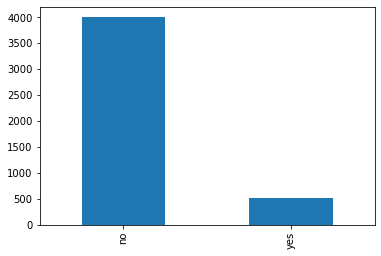

In [60]:
print("Target values counts:\n",df['y'].value_counts())
df['y'].value_counts().plot.bar()
plt.show()

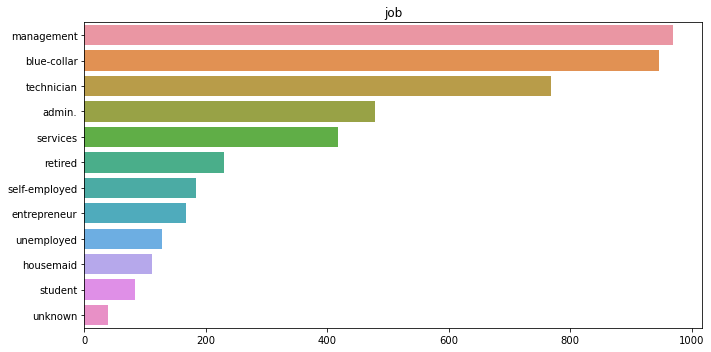

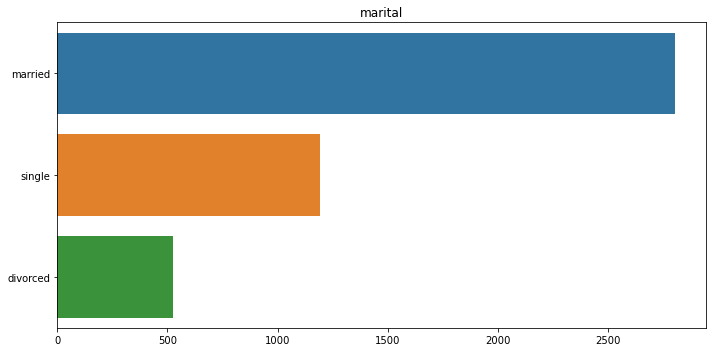

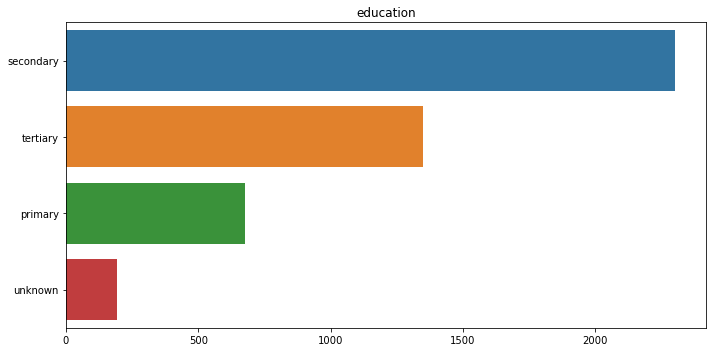

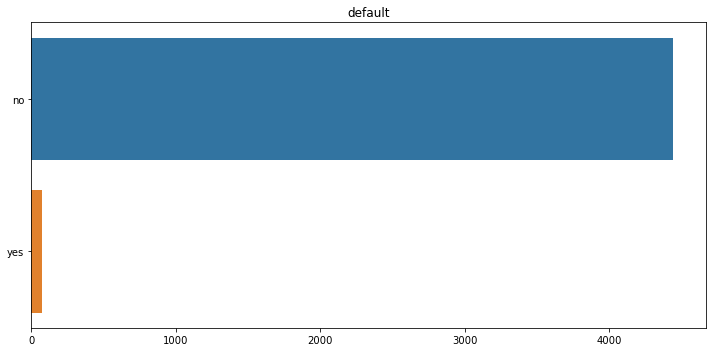

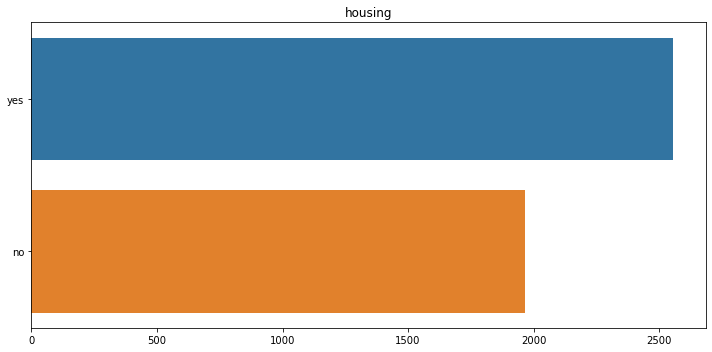

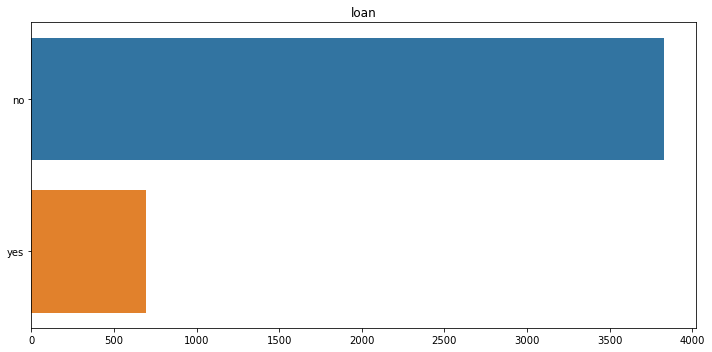

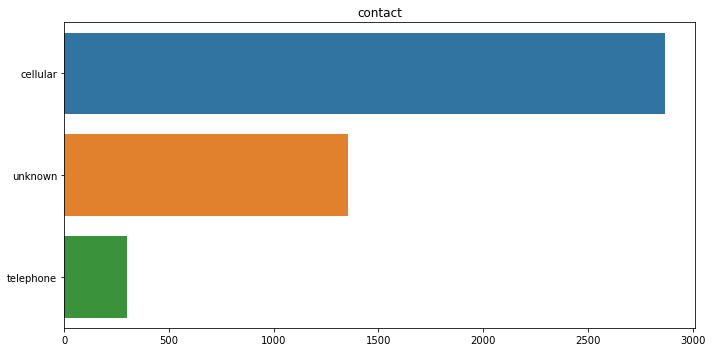

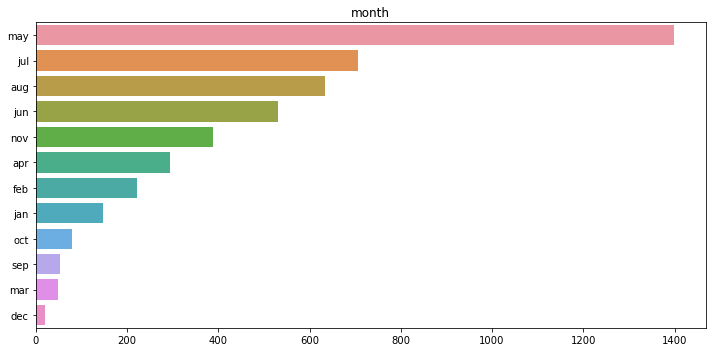

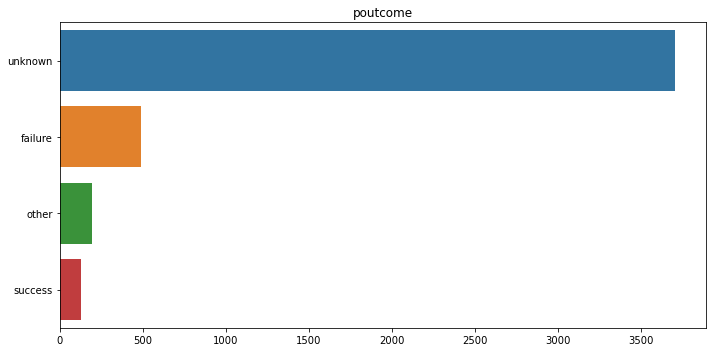

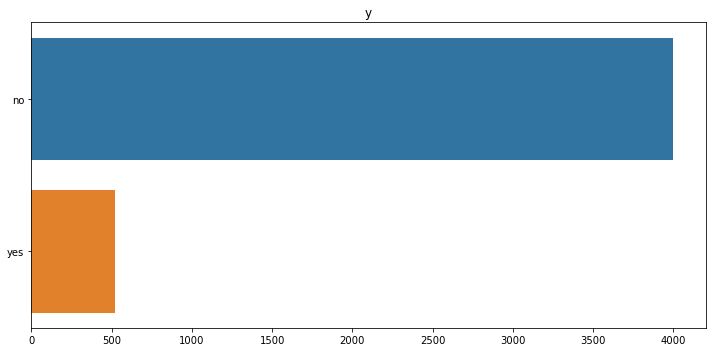

In [61]:
for col in cat_col:
    plt.figure(figsize=(10,5))    
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()

### Observations:

##### 1.Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
##### 2.Marital status: Most of them are married; married clients are almost twice as single people.
##### 3.Education: Most clients have university education level while illiterate people are very less.
##### 4.default: Most people have no default stay on their credit file.
##### 5.housing: Most people have housing loan.
##### 6.loan: Most people have no personal loan.
##### 7.contact: Common means of communication are cellular.
##### 8.month :May is the busy month and December is the least busy month (because of the holidays season).
##### 9.poutcome: outcome of the previous marketing campaign is unknown in most of the cases.

In [62]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,unknown,no,1787.0,no,no,cellular,19,oct,79.00000,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,263.88436,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00000,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00000,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.00000,1,-1,0,unknown,no


## Getting Dummies

In [63]:
df_new=pd.get_dummies(df.drop(['default'],axis=1),
                           drop_first=True)

In [64]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787.0,19,79.00000,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789.0,11,263.88436,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350.0,16,185.00000,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476.0,3,199.00000,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0.0,5,226.00000,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [65]:
X=df_new.drop(['y_yes'],axis=1)
y=df_new['y_yes']

In [66]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787.0,19,79.00000,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789.0,11,263.88436,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350.0,16,185.00000,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476.0,3,199.00000,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0.0,5,226.00000,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_yes, dtype: uint8

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [70]:
X_train.shape

(3390, 41)

In [71]:
X_test.shape

(1131, 41)

# Data Preprocessing

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
# Fit only to the training data
scaler.fit(X)

StandardScaler()

In [75]:
# Now apply the transformation to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train[:5]

array([[-1.15083193, -0.31085184, -1.20232553,  0.60911478, -0.57682947,
         3.22878025,  0.27012381,  1.94398296, -0.19645374, -0.15938189,
        -0.52230648, -0.23151795, -0.2053907 , -0.31876039, -0.13759255,
        -0.45236743, -0.17069641, -0.09206773,  0.78362389, -0.59872661,
        -1.01853043, -0.65213782,  4.72272418,  0.87640607, -0.42475611,
        -0.26564252, -0.6538608 , -0.40349553, -0.06665926, -0.22724418,
        -0.18396751, -0.43018482, -0.36480503, -0.10467601,  1.49462556,
        -0.30682776, -0.1342161 , -0.10786896, -0.21344711, -0.1713814 ,
        -2.1308311 ],
       [-0.67802054, -0.4069652 ,  0.49531188, -0.71608925,  0.06636847,
        -0.4072183 , -0.32041282, -0.5144078 , -0.19645374, -0.15938189,
        -0.52230648, -0.23151795, -0.2053907 , -0.31876039, -0.13759255,
         2.2105924 , -0.17069641, -0.09206773,  0.78362389, -0.59872661,
        -1.01853043,  1.5334182 , -0.2117422 , -1.14102359, -0.42475611,
        -0.26564252, -0.65386

# Training the model using SVM

In [77]:
from sklearn import svm

In [78]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [79]:
predictions = clf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(confusion_matrix(y_test,predictions))

[[1000   19]
 [  85   27]]


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1019
           1       0.59      0.24      0.34       112

    accuracy                           0.91      1131
   macro avg       0.75      0.61      0.65      1131
weighted avg       0.89      0.91      0.89      1131

